In [2]:
%pip install fast-ml
%pip install scikit-learn
%pip install numpy
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

train_dataset = pd.read_csv('../updated_train.csv')
label_encoder = LabelEncoder()
train_dataset['Sex'] = label_encoder.fit_transform(train_dataset['Sex'])

X  = train_dataset.drop("Survived",axis=1)
y = train_dataset["Survived"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,test_size=0.15)
print(X_train.shape)
print(X_test.shape)


(757, 5)
(134, 5)


In [5]:
def generate_hidden_layer_sizes(num_sizes, min_nodes, max_nodes):
    return [(np.random.randint(min_nodes, max_nodes),) for _ in range(num_sizes)]

In [6]:
import numpy as np

num_hidden_sizes = 10


min_nodes_per_layer = 50
max_nodes_per_layer = 250


hidden_layer_sizes = generate_hidden_layer_sizes(num_hidden_sizes, min_nodes_per_layer, max_nodes_per_layer)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "activation": ["identity","logistic","tanh","relu",],
    "solver": ["lbfgs","sgd","adam",],
    "learning_rate": ["constant","invscaling","adaptive",],
    "early_stopping": [True, False,],
    "validation_fraction": [0.15,],
    "hidden_layer_sizes": hidden_layer_sizes
}

mlp = GridSearchCV(
    MLPClassifier(),
    param_grid=param_grid,
    scoring=["accuracy","f1","precision","recall","roc_auc"],
    n_jobs=-1,
    cv=2,
    refit="f1",
    verbose=True
      )

mlp.fit(X_train,y_train)
mlp.best_score_

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7466949109284875

In [8]:
y_pred = mlp.predict(X_test)

In [9]:
from sklearn.metrics import precision_score
print(f"Multilayer perceptron precision score:{precision_score(y_test, y_pred)}")

Multilayer perceptron precision score:0.8333333333333334


In [10]:
from sklearn.metrics import recall_score
print(f"Multilayer perceptron recall score:{recall_score(y_test, y_pred)}")

Multilayer perceptron recall score:0.6862745098039216


In [11]:
from sklearn.metrics import f1_score
print(f"Multilayer perceptron f1 score:{f1_score(y_test, y_pred)}")

Multilayer perceptron f1 score:0.7526881720430109


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 

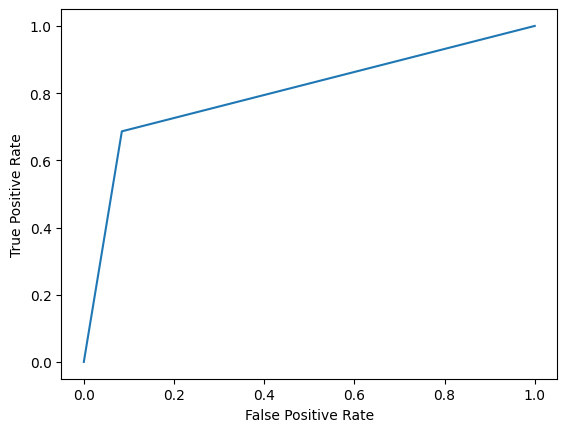

Multilayer perceptron AUC score: 0.8009685802031656


In [13]:
from sklearn.metrics import roc_auc_score
plot_roc_curve(y_test, y_pred)
plt.show()
print(f'Multilayer perceptron AUC score: {roc_auc_score(y_test, y_pred)}') 

#### Visualizing loss function

Text(0.5, 1.0, 'Loss Curve')

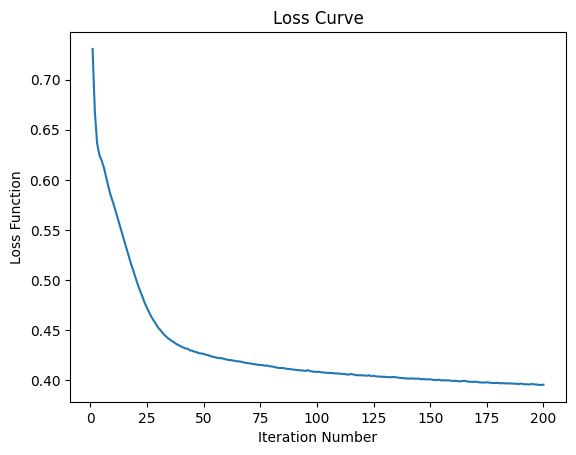

In [14]:
import matplotlib.pyplot as plt
iterations = [i for i in range(1,mlp.best_estimator_.n_iter_+1)]
loss_curve = mlp.best_estimator_.loss_curve_

plt.plot(iterations,loss_curve)
plt.xlabel("Iteration Number")
plt.ylabel("Loss Function")
plt.title("Loss Curve")

In [15]:
mlp.best_estimator_

MLPClassifier(hidden_layer_sizes=(206,), learning_rate='invscaling',
              validation_fraction=0.15)

In [16]:
mlp.cv_results_

{'mean_fit_time': array([0.06018674, 0.06716859, 0.17490947, 0.05213141, 0.05538237,
        0.13695943, 0.05963826, 0.23024833, 0.12476957, 0.05669451,
        0.05966318, 0.14065266, 0.04469132, 0.04695618, 0.08302271,
        0.05155969, 0.25253522, 0.05250871, 0.05097198, 0.04093921,
        0.13649821, 0.05590463, 0.07644403, 0.11136448, 0.09509957,
        0.30237675, 0.05965686, 0.06517386, 0.05720615, 0.06360018,
        0.03350985, 0.08253014, 0.05794692, 0.03420937, 0.18462276,
        0.05692983, 0.04082274, 0.04876518, 0.05864203, 0.05636156,
        0.05066359, 0.07521164, 0.0495944 , 0.29044604, 0.14066052,
        0.03709638, 0.04057896, 0.1184032 , 0.05336416, 0.03923833,
        0.10036027, 0.06665802, 0.25229061, 0.0882169 , 0.05827236,
        0.06624842, 0.14288247, 0.03999329, 0.09028292, 0.12842607,
        0.04862511, 0.29194093, 0.25117433, 0.03977644, 0.05540192,
        0.12055194, 0.03325903, 0.04479647, 0.05980718, 0.0419848 ,
        0.20537496, 0.16054368,

#### Visualizing Accuracy Changes

Text(0.5, 1.0, 'Precision')

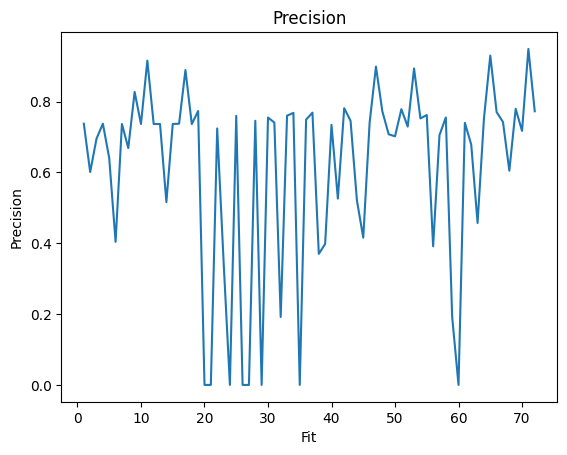

In [17]:
fits = [fit for fit in range(1,73)]
accuracy = mlp.cv_results_["mean_test_precision"][::10]
plt.plot(fits,accuracy)
plt.xlabel("Fit")
plt.ylabel("Precision")
plt.title("Precision")


Text(0.5, 1.0, 'Recall')

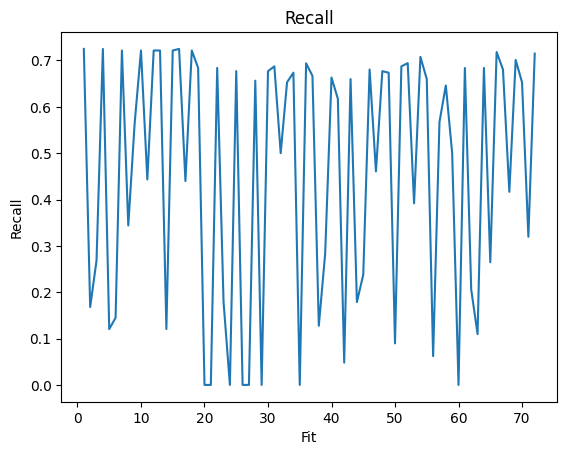

In [18]:
fits = [fit for fit in range(1,73)]
accuracy = mlp.cv_results_["mean_test_recall"][::10]
plt.plot(fits,accuracy)
plt.xlabel("Fit")
plt.ylabel("Recall")
plt.title("Recall")


Text(0.5, 1.0, 'F1 Score')

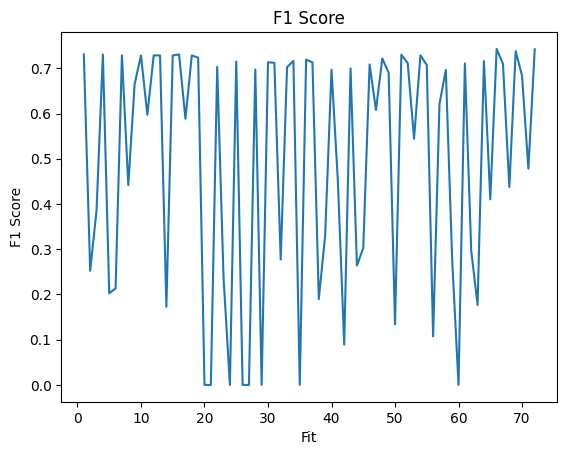

In [19]:
fits = [fit for fit in range(1,73)]
accuracy = mlp.cv_results_["mean_test_f1"][::10]
plt.plot(fits,accuracy)
plt.xlabel("Fit")
plt.ylabel("F1 Score")
plt.title("F1 Score")


Text(0.5, 1.0, 'ROC/AUC')

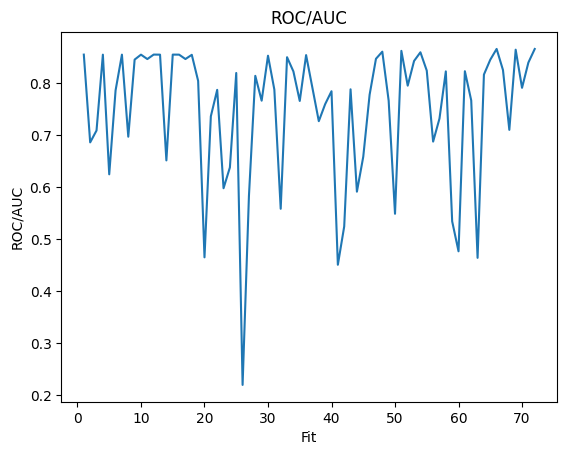

In [20]:
fits = [fit for fit in range(1,73)]
accuracy = mlp.cv_results_["mean_test_roc_auc"][::10]
plt.plot(fits,accuracy)
plt.xlabel("Fit")
plt.ylabel("ROC/AUC")
plt.title("ROC/AUC")
